<a href="https://colab.research.google.com/github/Yu-Hayung/Python-Machine-Learning-and-Deep-Learning/blob/main/2_%ED%9B%88%EB%A0%A8_%EC%84%B8%ED%8A%B8%EC%99%80_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%84%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 훈련 세트와 테스트 세트 


In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

print(fish_data[4])

print(fish_data[0:5])

[29.0, 430.0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
print(fish_data[:5])

print(fish_data[44:])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


# 테스트셋과 트레이닝셋으로 나누기 


In [ ]:
train_input = fish_data[:35]       # 훈련 세트로 입력값 0~34 인덱스 사용
train_target = fish_target[:35]    # 훈련 세트로 타깃값 0~34 인덱스 사용
test_input = fish_data[:35]       # 테스트 세트로 입력값 0~34 인덱스 사용
test_target = fish_target[:35]    # 테스트 세트로 타깃값 0~34 인덱스 사용

In [ ]:
kn = kn.fit(train_input, train_target)    # fit() : 훈련함수 
kn.score(test_input, test_target)         # score() : 평가 

1.0

score = 0.0 이면 훈련되 되지 않음 1에 가까울 수록 훈련이 잘됨을 의미 

# 샘플링 편향 막기 

샘플링 편향을 막기 위해서 고르게 데이터를 섞어 샘플을 뽑아야 한다. 

이러한 처리를 할 수 있도록 새로운 파이썬 라이브러리인 **넘파이**를 다운로드해 사용한다. 


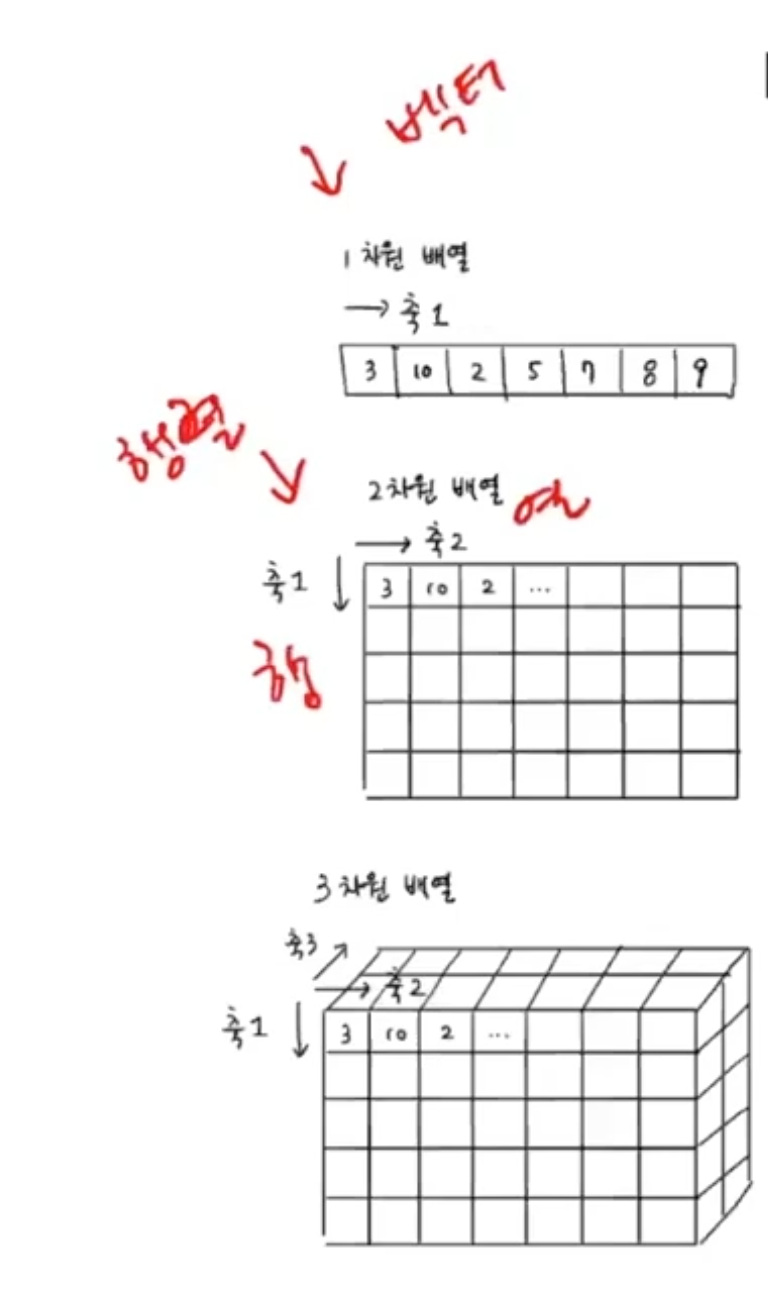

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

print(input_arr.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


# arange() 증가하는 인덱스를 만들 수 있다. 

In [ ]:
np.random.seed(42)  # seed(난수 고정)


index = np.arange(49)   # 인덱스 만들기 
np.random.shuffle(index)   # 인덱스 섞기 np.random.shuffle 


print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


**일치하는 결과 도출 **

input_arr[13], train_input[0]

[ 32. 340.] [ 32. 340.]


In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

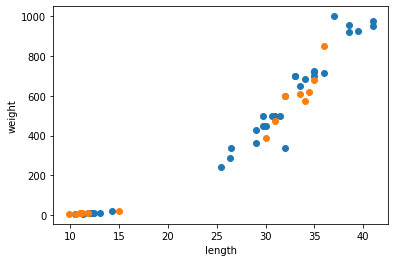

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

 파랑색 = 훈련 
 
 주황색 = 테스트 

양쪽에 도미와 빙어가 모두 섞여 있는 의도한 대로 만들어진것을 볼 수 있다. 


# 두번째 머신러닝 프로그램

In [ ]:
kn = kn.fit(train_input, train_target)

kn.score(test_input, test_target)

1.0

정확도 100% 모든 생선을 맞혔다. 

predict() 메서드로 테스트세트의 예측 결과와 실제 타깃을 확인해 볼 수 있다. 

In [ ]:
print(kn.predict(test_input))
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 데이터 전처리 

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 넘파이의 stack

stack(([1,2,3], [4,5,6])) 함수로 리스트를 일렬로 세워 연결한다. 연결한 리스트는 튜플로 전달된다. 

In [ ]:
import numpy as np

np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


원소가 하나인 리스트 [1],[0] 여러번 곱해서 타깃 데이터를 만들수 있지만

np.ones() 와 np.zeros() 이 두 함수는 각각 원하는 개수의 1과 0을 채운 배열을 만들어 준다. 

In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# 사이킷런으로 훈련셋 테스트셋 나누기 

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) #random_state = seed 
# train_test_split 넘파일배열로 손쉽게 받을 수 있음 

print(train_input.shape, test_input.shape)

print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25, 150]]))  # 0 = 빙어로 예측함 

[0.]


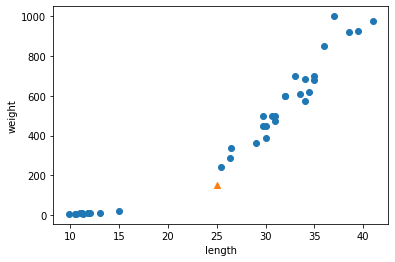

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')     # marker 매개변수는 모양을 지정한다. 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**indexes() 넘파이 배열 인덱싱**

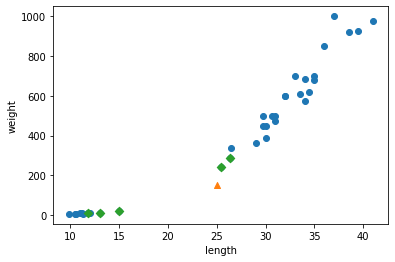

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')     # marker 매개변수는 모양을 지정한다. 
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')  # 인덱스 배열 인데싱 가까운 샘플 마름모 표시 
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


육안으로 볼때는 도미와 거리가 가까워 보이지만 

y축 은 단위가 200이기 때문에 대비 왼쪽과 가까운 것을 볼 수 있다. 

눈으로 명확하게 하기 위한 그래프는 하단부분 참고 



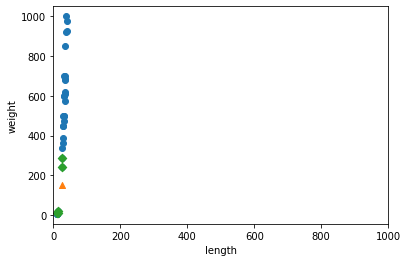

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')     # marker 매개변수는 모양을 지정한다. 
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')  
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(train_input[indexes])

print(train_target[indexes])

print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 13.   12.2]
  [ 26.3 290. ]
  [ 11.8  10. ]]]
[[1. 0. 0. 1. 0.]]
[[ 92.00086956 130.48375378 138.32150953 140.00603558 140.62090883]]


# 표준 점수로 바꾸기 

In [ ]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

print(mean, std)


[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [ ]:
train_scaled = (train_input - mean) / std  # 넘파이의 브로드캐스팅 이라고 부른다. 두 표준편차를 다시 모든 행에 적용되는 것 

print(train_scaled)

[[ 0.37460577  0.09920189]
 [ 0.27666962 -0.17125451]
 [ 0.34522492  0.2546366 ]
 [-1.45680021 -1.27266487]
 [-1.40783213 -1.26862357]
 [-1.29030875 -1.26178444]
 [ 0.57047806  0.56550602]
 [ 0.44316107  0.2546366 ]
 [ 0.66841421  0.87637544]
 [ 0.86428651  0.87637544]
 [ 1.4519034   1.73126635]
 [ 1.20706303  1.56028817]
 [-0.07590051 -0.54740651]
 [-1.3882449  -1.26924531]
 [ 1.30499918  1.57583164]
 [ 0.34522492  0.09920189]
 [ 1.06015881  1.80898371]
 [ 0.47254192  0.2546366 ]
 [-1.53514913 -1.2763953 ]
 [ 0.01224202 -0.39818919]
 [ 0.76635036  0.82974503]
 [ 0.03182925 -0.24275448]
 [-1.52535551 -1.27794965]
 [-1.60370443 -1.27888226]
 [ 0.86428651  0.81420156]
 [-1.46659382 -1.26924531]
 [ 0.47254192  0.17691924]
 [ 0.81531843  0.6276799 ]
 [ 0.71738229  0.59659296]
 [-1.09443646 -1.2378475 ]
 [ 0.76635036  0.48778866]
 [ 0.37460577 -0.08731977]
 [-1.40783213 -1.26893444]
 [ 0.57047806  0.56550602]
 [ 0.96222266  1.34267957]
 [-1.48618105 -1.26955618]]


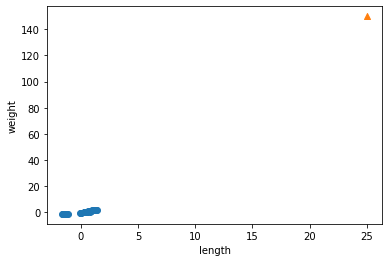

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

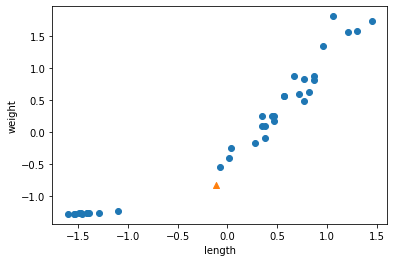

In [ ]:
new = ([25, 150] - mean) / std 

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
test_scaled = (test_input - mean) / std    # 꼭 표준편차 값으로 나눠야 제대로 훈련된 것을 사용할 수 있다. 

print(kn.score(test_scaled, test_target))

print(kn.predict([new]))  # 도미로 변경된 예측을 볼 수 있다. (빙어라고 했으나 이젠 도미라고 한다.) = 스케일을 조절하여 훈련을 적절하게 한 결과이다.

1.0
[1.]


In [ ]:
distances, indexes = kn.kneighbors([new])

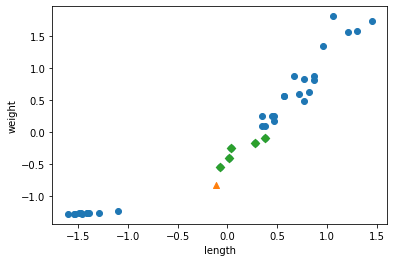

In [ ]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker ='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()